# **Import Packages**

In [1]:
import numpy as np 
from matplotlib import pyplot as plt 
import os 
from PIL import Image
from random import sample


# **Function for Operating**

In [2]:
#Function to assign each vector component a value from {-1,1} (signed representation)
def signed_values(x):
    return_val = x
    for i in range(0, x.shape[0]):
        if x[i] > 0:
            return_val[i] = 1
        else:
            return_val[i] = -1
    return return_val    
    

#Actually our matrix definition (in other words: our model) 
def hopfield_fit(samples): # dim = 128*128
    dim = samples.shape[1]
    matrix = np.zeros((dim, dim))    
    mean = np.sum([np.sum(t) for t in samples])/(len(samples)*dim) 
    print("Mean:",mean)
    
    for x_unsigned in samples: 
        x = signed_values(x_unsigned)
        for i in range(0, dim-1):
            for j in range(i+1, dim):
                matrix[i, j] = (matrix[i, j] + x[i]*x[j]) - mean
                matrix[j, i] = (matrix[i, j])
    return matrix/dim
    

#Function of outputs of the model
    
def hopfield_result(matrix, y_unsigned, samples, max_iter=-1):
    dim = matrix.shape[0]
    checker = 0
    counter = 0
    y = signed_values(y_unsigned)
    z = np.zeros(dim)
    zi = z + 2
    
    if (max_iter != -1):
        max_it = max_iter 
    else:
        max_it = dim
    
    while ((checker==0) and (not (z == zi).all()) and counter<max_it):
        
        counter = counter + 1
        zi = z + 0

        for j in range(0, dim):
            d = 0
            for i in range(0, dim):
                d = d + matrix[i, j]*y[i]
            if d>0:
                z[j] = 1
            else:
                z[j] = -1
        y = z + 0
        for x_unsigned in samples:
            x = signed_values(x_unsigned)
            if np.array_equal(x, z):
                checker = 1          
    return z


#Function to make visualization more clear for more than one iteration
def iterations_progress(hopfield_matrix, data, training_data):
    results = np.zeros((9, training_data.shape[1]))
    size = int(training_data.shape[1]**(1/2))
    results[0] = hopfield_result(hopfield_matrix, data, training_data, max_iter = 1)
    plt.subplot(331)
    plt.imshow(results[0].reshape(size,size))
    for i in range(1, 9):
        results[i] = hopfield_result(hopfield_matrix, results[i-1], training_data, max_iter = 1)
        k = 330+i+1
        plt.subplot(k)
        plt.imshow(results[i].reshape(size,size))

In [3]:
def image_to_np(path):
    image = Image.open(path)
    np_vector = np.asarray(image)
    try:
        np_vector = np_vector[:, :, 0]
    except IndexError:
        pass
    np_vector = np.where(np_vector<128, -1, 1)
    np_vector = np_vector.reshape(np_vector.shape[0]**2)
    return np_vector

In [4]:
def add_noise(num_noisy_pixel, images):
  size=images.shape
  img_=images
  for img in range(0,size[0]):
    n=list(range(0,128*128))
    random=sample(n,num_noisy_pixel)
    for i in random:
      img_[img][i]=-img_[img][i]
  return img_

In [5]:
def similarity(img1,img2):
  sim=[]
  for num1, num2 in zip(img1, img2):
    sim.append(num1 * num2)
  similarity=sum(sim)/len(sim)
  return similarity

In [6]:
def mse(img1,img2):
  d=[]
  for num1, num2 in zip(img1, img2):
    if num1==-1:
      num1=0
    if num2==-1:
      num2=0
    d.append((num1 - num2)**2)
  mse=sum(d)/len(d)
  return mse


# **1. Data Input**

In [14]:
PATH = '/content/train/'

numbers_set = np.asarray([image_to_np(os.path.join(PATH, 'astronaut.png')),
                     image_to_np(os.path.join(PATH, 'camera.png')),
                     image_to_np(os.path.join(PATH, 'chelsea.png')),
                     image_to_np(os.path.join(PATH, 'coffee.png')),
                     image_to_np(os.path.join(PATH, 'hourse.png')),
                     image_to_np(os.path.join(PATH, 'motorcycle.png'))])

                     

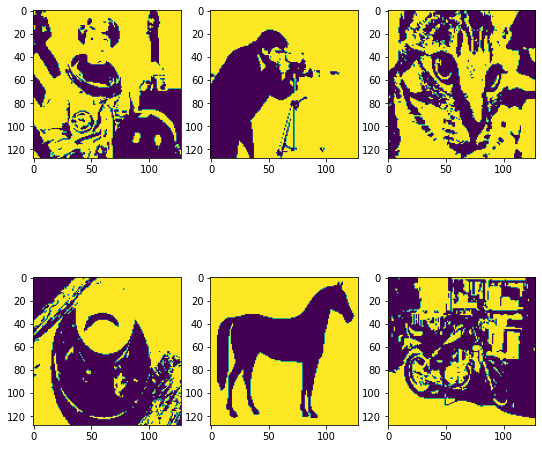

In [9]:
plt.figure(figsize=(9,9))
for i in range(0,6):
    plt.subplot(2,3,1+i)
    plt.imshow(numbers_set[i].reshape(128,128))


# **Testing the Network**

In [10]:
#Visual representation of our Hopfield matrix
training_data = numbers_set
hopfield_matrix = hopfield_fit(training_data)



Mean: 0.16607666015625


# **2.The Weight Matrix**

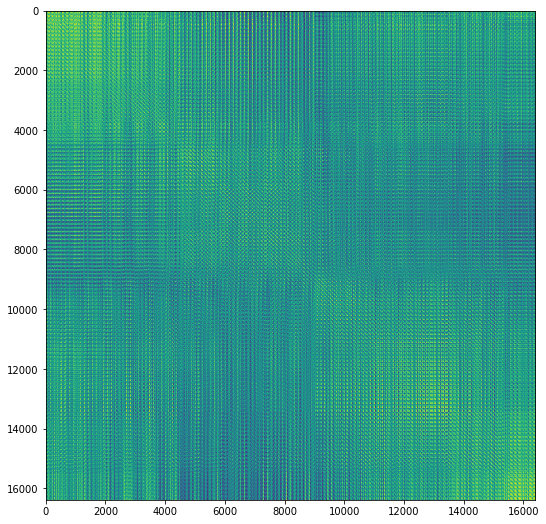

In [ ]:
plt.figure(figsize=(9,9))
plt.imshow(hopfield_matrix)


# **3. Training data as network inputs**

In [ ]:
# Checking the results on Training Data
result=[0]*6
for i in range(0,6):
  result[i] = hopfield_result(hopfield_matrix, numbers_set[i], training_data, max_iter = 1)


The similarity between two images is:   1.0
The mean squared error is:    0.0


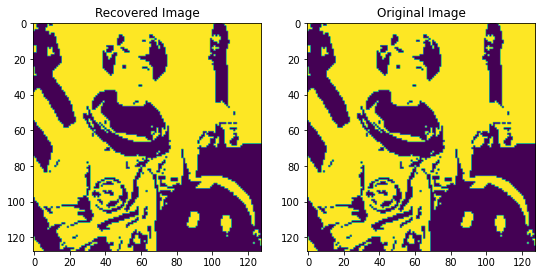

The similarity between two images is:   0.9835205078125
The mean squared error is:    0.00823974609375


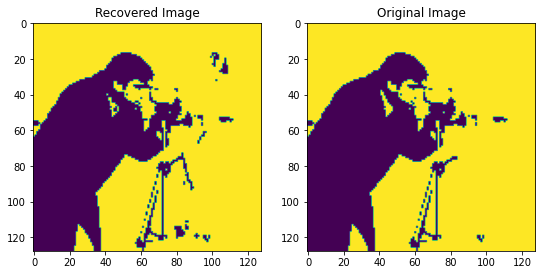

The similarity between two images is:   1.0
The mean squared error is:    0.0


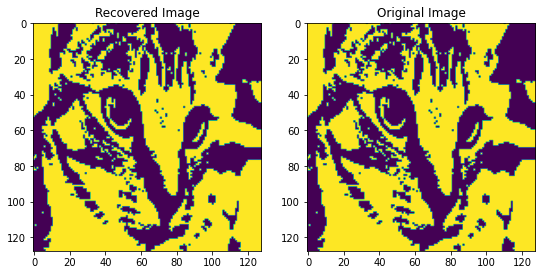

The similarity between two images is:   1.0
The mean squared error is:    0.0


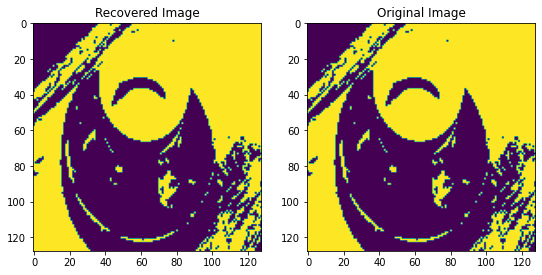

The similarity between two images is:   1.0
The mean squared error is:    0.0


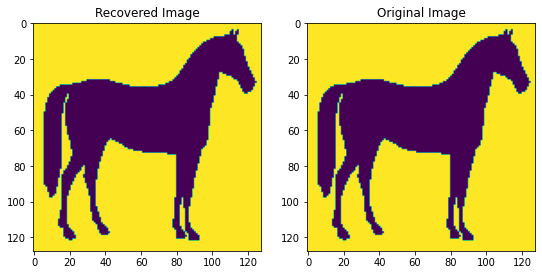

The similarity between two images is:   1.0
The mean squared error is:    0.0


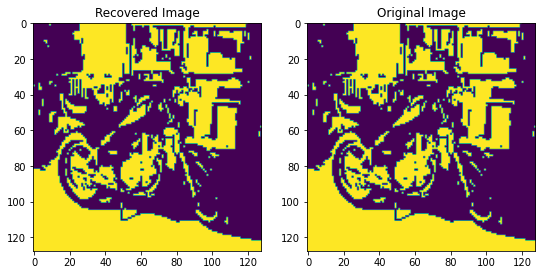

In [ ]:
for i in range(0,6):
    plt.figure(figsize=(9,9))
    plt.subplot(1,2,1)
    plt.imshow(result[i].reshape(128,128))
    plt.title("Recovered Image")
    plt.subplot(1,2,2)
    plt.imshow(numbers_set[i].reshape(128,128))
    plt.title("Original Image")
    print('The similarity between two images is:  ',similarity(numbers_set[i],result[i]))
    print('The mean squared error is:   ', mse(numbers_set[i],result[i]) )
    plt.show()

# **4. Adding noise to images**

number of noisy pixel=3000

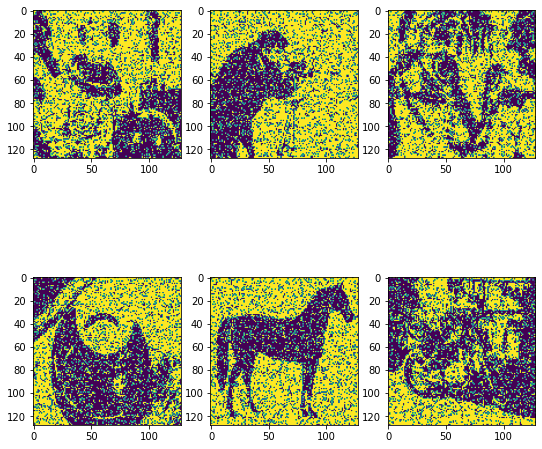

In [ ]:
noisy_images=add_noise(num_noisy_pixel=3000,images=numbers_set)
plt.figure(figsize=(9,9))
for i in range(0,6):
    plt.subplot(2,3,1+i)
    plt.imshow(noisy_images[i].reshape(128,128))

# **5. Correlation of noisy images and original ones**

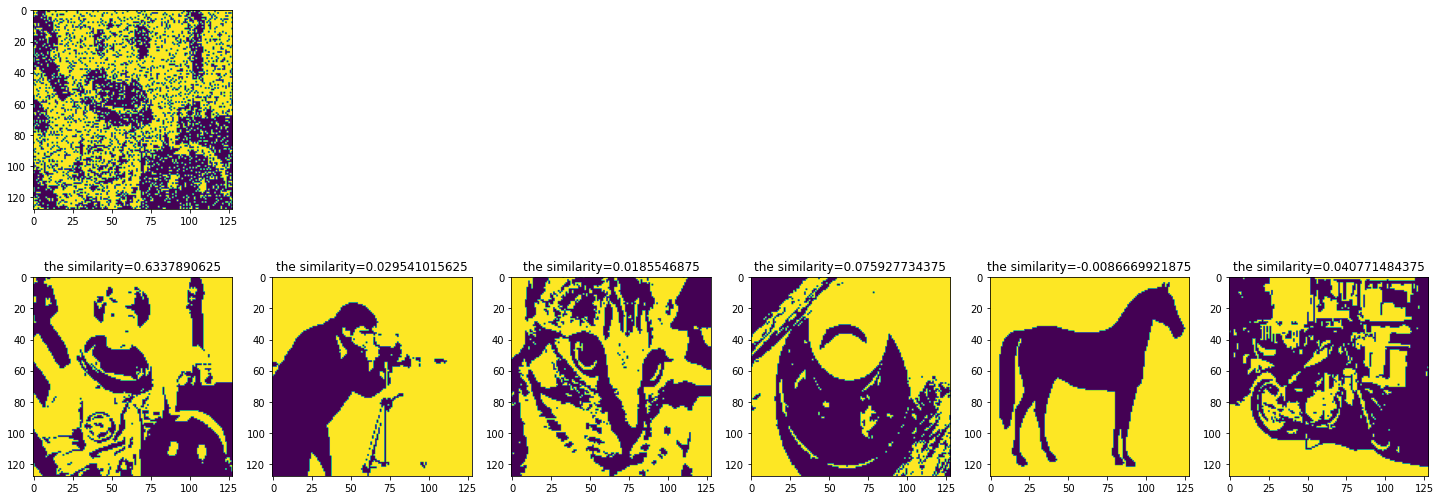

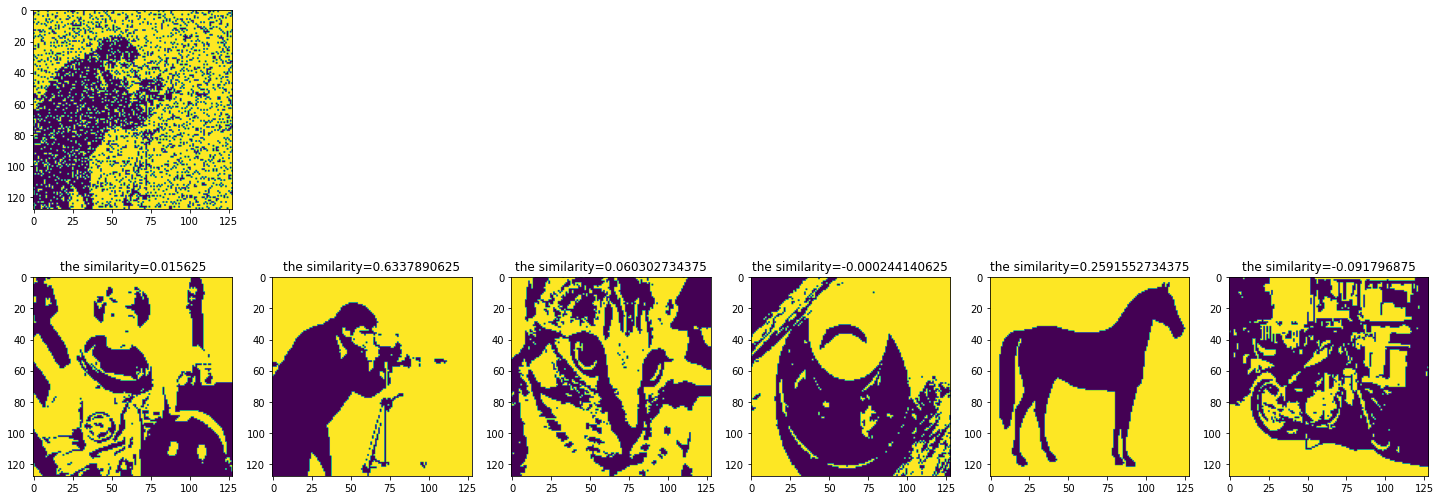

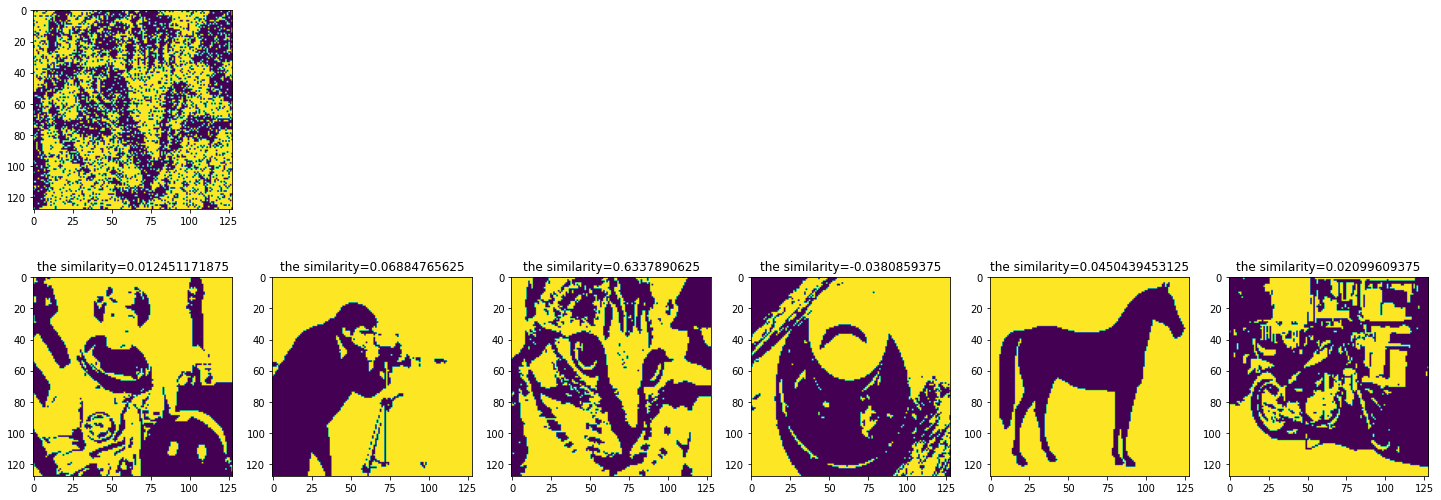

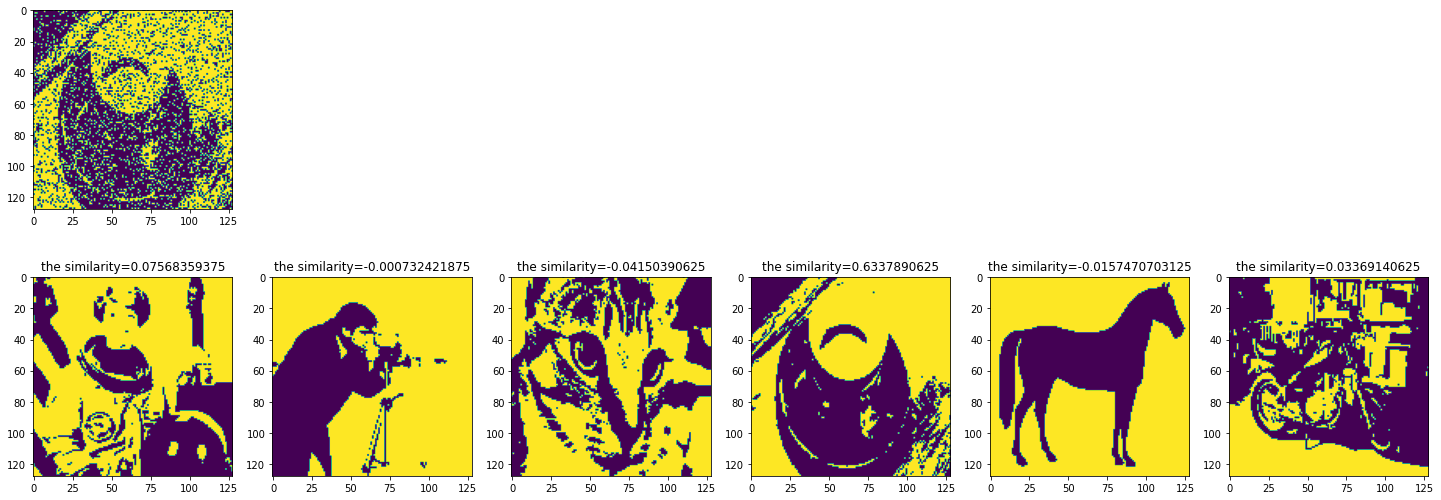

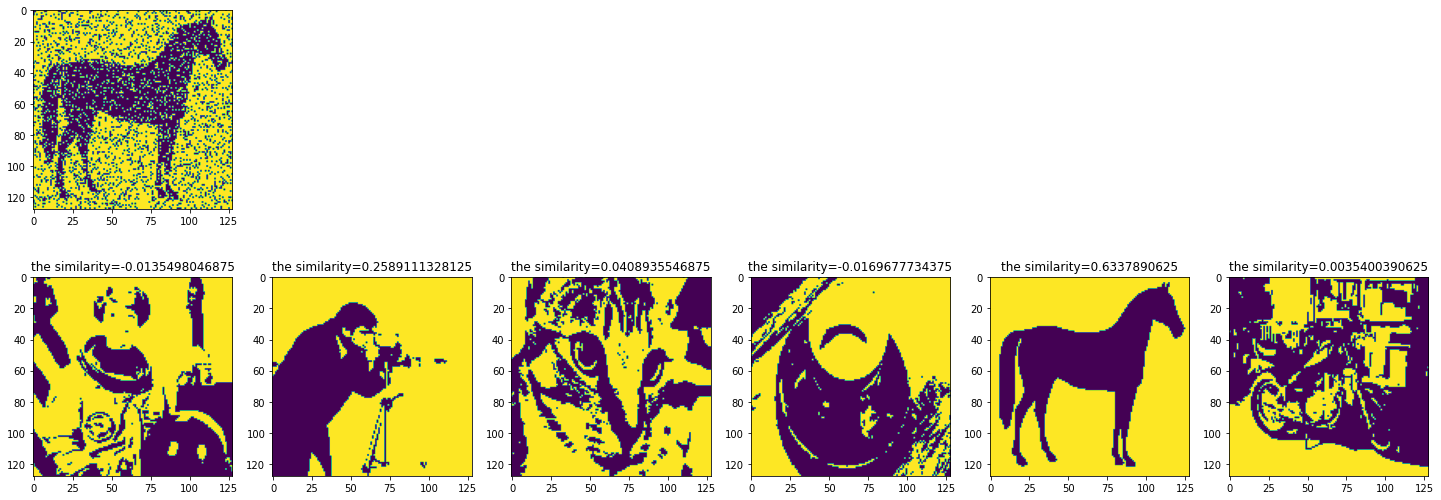

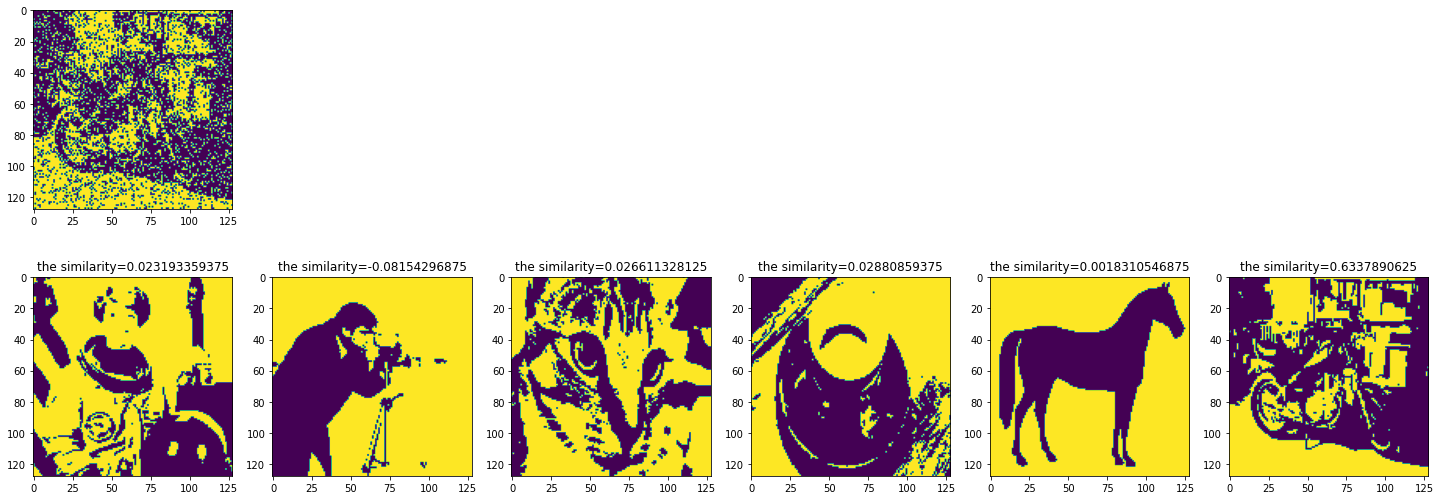

In [ ]:
for j in range(0,6):
  plt.figure(figsize=(25,9))
  plt.subplot(2,6,1)
  plt.imshow(noisy_images[j].reshape(128,128))
  for i in range(0,6):
    plt.subplot(2,6,7+i)
    plt.imshow(numbers_set[i].reshape(128,128))
    plt.title(f'the similarity={similarity(numbers_set[i],noisy_images[j])}')

# **6. noisy images as network inputs**

In [ ]:
# Checking the results on Training Data
result_noisy1=[0]*6
for i in range(0,6):
  result_noisy1[i] = hopfield_result(hopfield_matrix,noisy_images[i], training_data, max_iter = 1)

The similarity between two images is:   0.6337890625
The mean squared error is:    0.18310546875


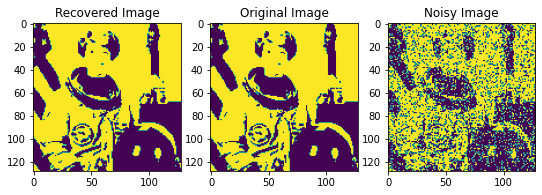

The similarity between two images is:   0.6224365234375
The mean squared error is:    0.18878173828125


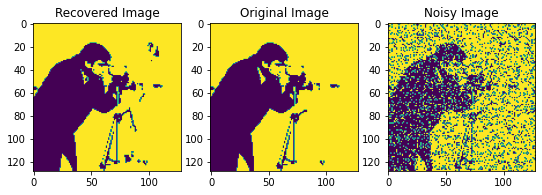

The similarity between two images is:   0.6337890625
The mean squared error is:    0.18310546875


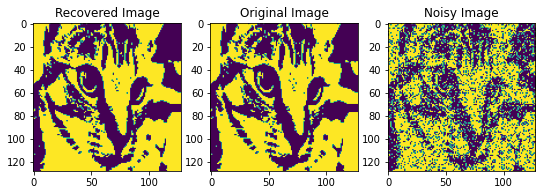

The similarity between two images is:   0.6337890625
The mean squared error is:    0.18310546875


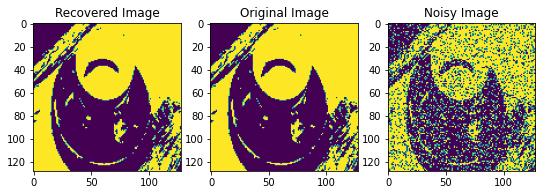

The similarity between two images is:   0.6337890625
The mean squared error is:    0.18310546875


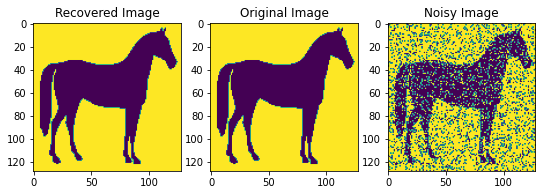

The similarity between two images is:   0.6337890625
The mean squared error is:    0.18310546875


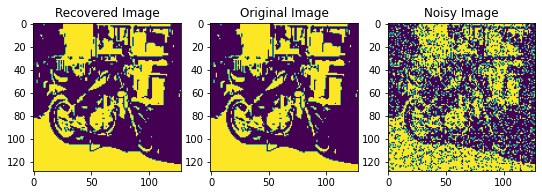

In [ ]:
for i in range(0,6):
    plt.figure(figsize=(9,9))
    plt.subplot(1,3,1)
    plt.imshow(result_noisy1[i].reshape(128,128))
    plt.title("Recovered Image")
    plt.subplot(1,3,2)
    plt.imshow(numbers_set[i].reshape(128,128))
    plt.title("Original Image")
    plt.subplot(1,3,3)
    plt.imshow(noisy_images[i].reshape(128,128))
    plt.title("Noisy Image")
    print('The similarity between two images is:  ',similarity(noisy_images[i],result_noisy1[i]))
    print('The mean squared error is:   ', mse(noisy_images[i],result_noisy1[i]) )
    plt.show()

# **7. Adding noise to images**

number of noisy pixel=8000

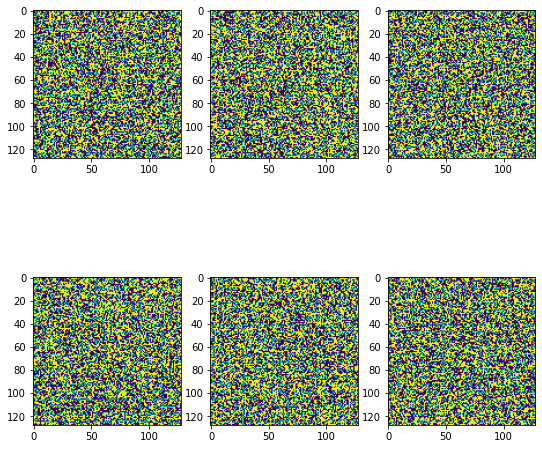

In [11]:
noisy_images=add_noise(num_noisy_pixel=8000,images=numbers_set)
plt.figure(figsize=(9,9))
for i in range(0,6):
    plt.subplot(2,3,1+i)
    plt.imshow(noisy_images[i].reshape(128,128))

In [12]:
# Checking the results on Training Data
result_noisy1=[0]*6
for i in range(0,6):
  result_noisy1[i] = hopfield_result(hopfield_matrix,noisy_images[i], training_data, max_iter = 1)

The similarity between two images is:   0.0194091796875
The mean squared error is:    0.49029541015625


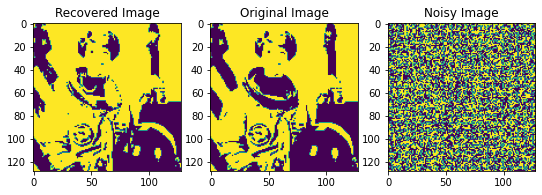

The similarity between two images is:   0.0316162109375
The mean squared error is:    0.48419189453125


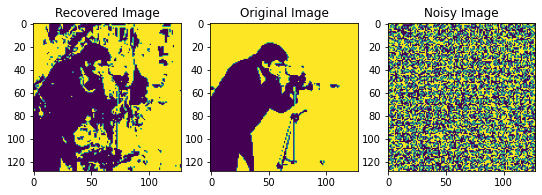

The similarity between two images is:   0.0167236328125
The mean squared error is:    0.49163818359375


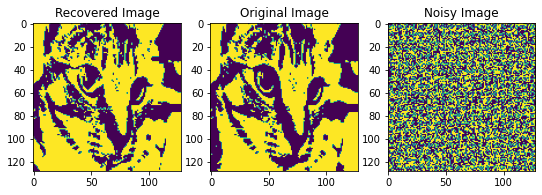

The similarity between two images is:   0.021484375
The mean squared error is:    0.4892578125


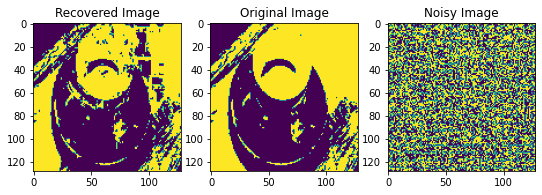

The similarity between two images is:   -0.0152587890625
The mean squared error is:    0.50762939453125


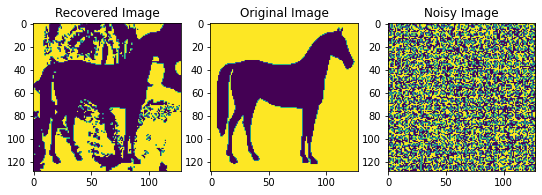

The similarity between two images is:   0.009765625
The mean squared error is:    0.4951171875


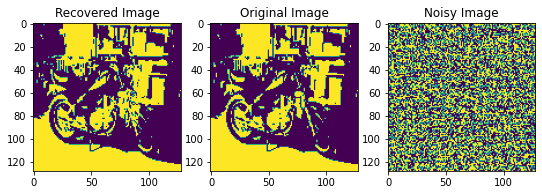

In [15]:
for i in range(0,6):
    plt.figure(figsize=(9,9))
    plt.subplot(1,3,1)
    plt.imshow(result_noisy1[i].reshape(128,128))
    plt.title("Recovered Image")
    plt.subplot(1,3,2)
    plt.imshow(numbers_set[i].reshape(128,128))
    plt.title("Original Image")
    plt.subplot(1,3,3)
    plt.imshow(noisy_images[i].reshape(128,128))
    plt.title("Noisy Image")
    print('The similarity between two images is:  ',similarity(noisy_images[i],result_noisy1[i]))
    print('The mean squared error is:   ', mse(noisy_images[i],result_noisy1[i]) )
    plt.show()

## **Increasing Number of Iteration**

In [22]:
# Checking the results on Training Data
result_noisy1=[0]*6
for i in range(0,6):
  result_noisy1[i] = hopfield_result(hopfield_matrix,noisy_images[i], training_data, max_iter = 10)

The similarity between two images is:   0.0234375
The mean squared error is:    0.48828125


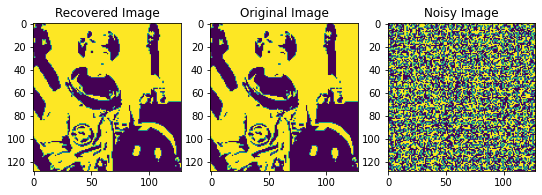

The similarity between two images is:   0.023193359375
The mean squared error is:    0.4884033203125


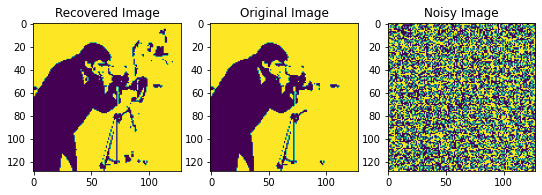

The similarity between two images is:   0.0234375
The mean squared error is:    0.48828125


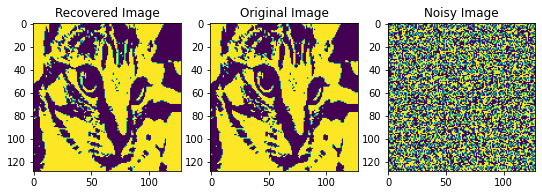

The similarity between two images is:   0.0234375
The mean squared error is:    0.48828125


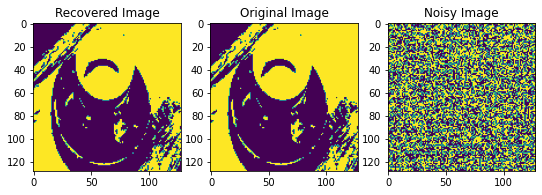

The similarity between two images is:   0.0146484375
The mean squared error is:    0.49267578125


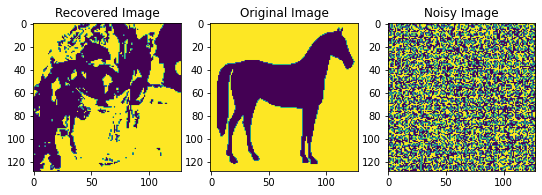

The similarity between two images is:   0.0234375
The mean squared error is:    0.48828125


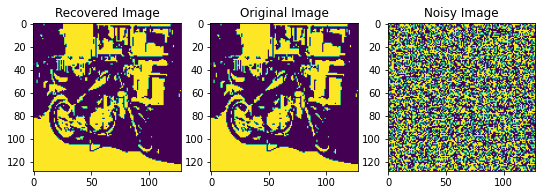

In [24]:
for i in range(0,6):
    plt.figure(figsize=(9,9))
    plt.subplot(1,3,1)
    plt.imshow(result_noisy1[i].reshape(128,128))
    plt.title("Recovered Image")
    plt.subplot(1,3,2)
    plt.imshow(numbers_set[i].reshape(128,128))
    plt.title("Original Image")
    plt.subplot(1,3,3)
    plt.imshow(noisy_images[i].reshape(128,128))
    plt.title("Noisy Image")
    print('The similarity between two images is:  ',similarity(noisy_images[i],result_noisy1[i]))
    print('The mean squared error is:   ', mse(noisy_images[i],result_noisy1[i]) )
    plt.show()